<a href="https://colab.research.google.com/github/MoLo404Ko/python_autoencoder_handnumbers/blob/main/handwrite_number_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#ЗАДАЧА ОБУЧИТЬ НС СО СТРУКТУРОЙ AUTOENCODER ДЛЯ ВОССТАНОВЛЕНИЯ ЦИФР С ИЗОБРАЖЕНИЙ
#ИЗОБРАЖЕНИЯ В ФОРМАТЕ 28X28 ЧБ ФОРМАТ
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input

Подготавливаем данные

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255
y_train = y_train / 255


# reshape трансформирует массив в новый без именения данных, в нашем случае в
# массив 28x28 в 1 столбец, т.к. изображения 28 на 28 px.
# Изначально x_train имеет 60к изображений по 28x28px, которые отображаются как
# 60к матриц 28 на 28
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

Строим модель НС

In [36]:
#Слой Input описывает структуры входных данных
input_img = Input((28,28,1))
#Далее изображение вытягивается в 1 вектор на 784 сигналов
x = Flatten()(input_img)
#Создаем слой и связываем с предыдущим слоем (x)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)
#Слой скрытого состояния
encoded = Dense(49, activation="relu")(x)

#Создаем слои декодера
d = Dense(64, activation="relu")(encoded)
#sigmoid - т.к. необходимо получить данные в диапазоне от 0 до 1
d = Dense(28*28,activation="sigmoid")(d)
#Reshape - слой преобразующий входные данные в заданный формат
#Здесь обратно возвращаем вектор в формат матрциы 28x28
decoded = Reshape((28,28,1))(d)

#Формируем и компилируем модель Autoencoder
autoencoder = keras.Model(input_img, decoded, name="autoencoder")
autoencoder.compile(optimizer="adam", loss="mean_squared_error")

Обучение НС

In [38]:
batch_size = 100
#Подаем на вход и выход одинаковые данные, чтобы модель приближалась
#к изначальному изображению, shuffle указывает перетасовывать ли данные перед
#каждой эпохой
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size = batch_size,
                shuffle=True
                )

Epoch 1/20
600/600 [==============================] - 6s 8ms/step - loss: 0.0447
Epoch 2/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0208
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0164
Epoch 4/20
600/600 [==============================] - 6s 11ms/step - loss: 0.0143
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0131
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0121
Epoch 7/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0113
Epoch 8/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0106
Epoch 9/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0100
Epoch 10/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0096
Epoch 11/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0093
Epoch 12/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0090
Epoch 13/20
600/600 

Отображение первых 10 элементов и результата их декодирования

1/1 [==============================] - 0s 24ms/step


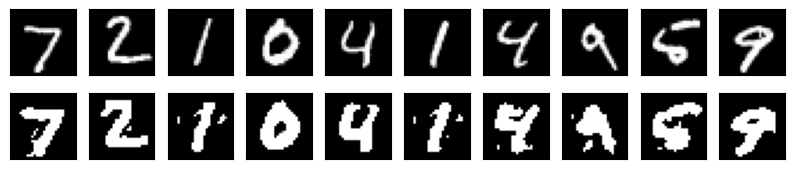

In [39]:
n = 10
imgs = x_test[:n]
decoded_imgs = autoencoder.predict(x_test[:10], batch_size=n)

#figure - создает новую фигуру
plt.figure(figsize=(n,2))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  #squeeze удаляет последнюю размерность из (28,28,1)
  plt.imshow(imgs[i].squeeze(), cmap="gray")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax2 = plt.subplot(2, n, i+n+1)
  plt.imshow(decoded_imgs[i].squeeze(), cmap="gray")
  ax2.get_xaxis().set_visible(False)
  ax2.get_yaxis().set_visible(False)